In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [2]:
# Load the dataset
file_path = r'C:\Users\aayus\OneDrive\Desktop\titanic\Titanic-Dataset.csv' 
titanic_data = pd.read_csv(file_path)

In [3]:
# Preprocessing: Handle missing values and encode categorical variables
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])
titanic_data.drop(columns=['Cabin'], inplace=True)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)
titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [4]:
# Define features (X) and target variable (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
# Predict on the test set
y_pred = model.predict(X_test)

In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_rep)

Model Accuracy: 81.01%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



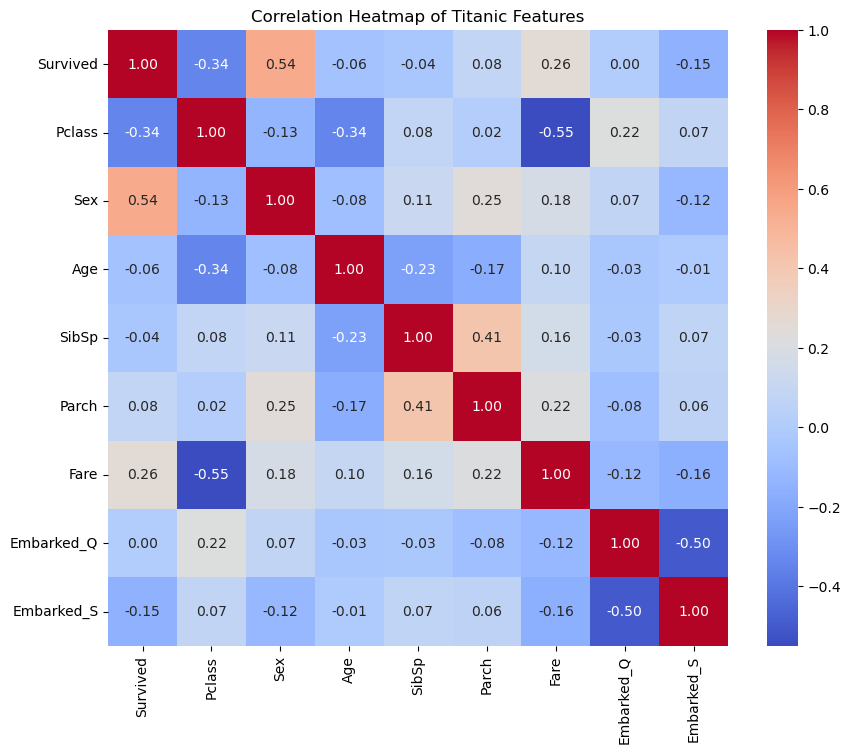

In [9]:
# 1. Visualizations

# Correlation heatmap to understand feature relationships
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Titanic Features")
plt.show()

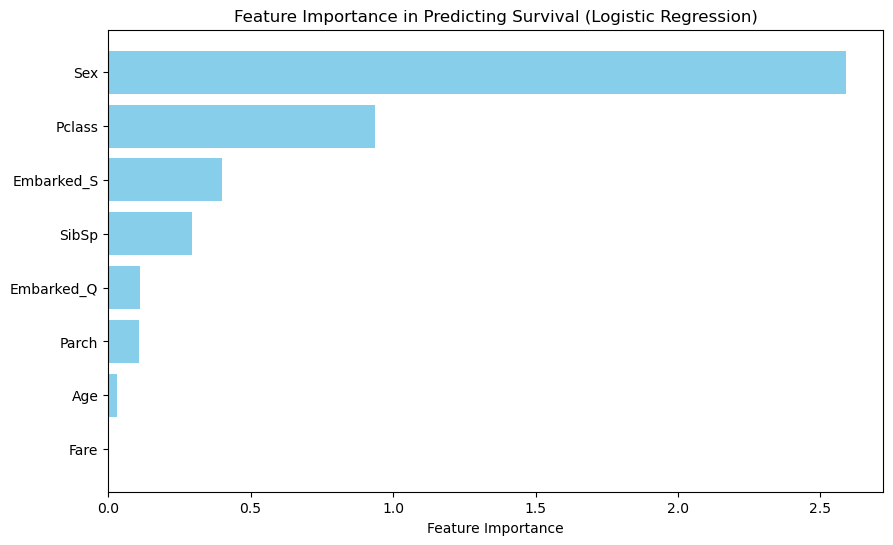

In [10]:
# Feature importance based on model coefficients
feature_importance = abs(model.coef_[0])
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Predicting Survival (Logistic Regression)")
plt.show()

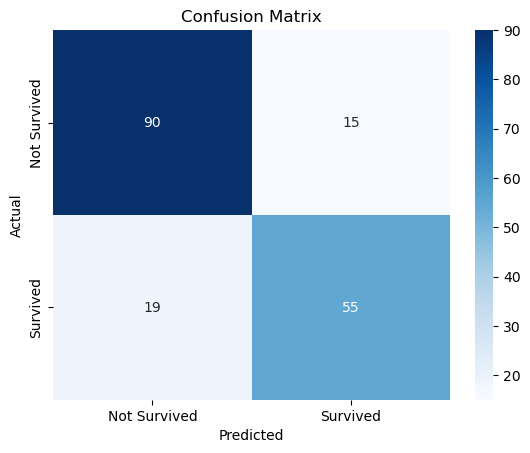

In [11]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# 2. Predict Survival of a Specific Passenger

# Define a sample passenger's features (example: male, 3rd class, age 25, no siblings/spouses or parents/children, fare $10.5, embarked from S)
sample_passenger = pd.DataFrame({
    'Pclass': [3],
    'Sex': [0],  # 0 for male
    'Age': [25],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [10.5],
    'Embarked_Q': [0],  # One-hot encoded column for Embarked (Q)
    'Embarked_S': [1]   # One-hot encoded column for Embarked (S)
})

In [13]:
# Ensure the sample matches the feature columns used in training
for column in X.columns:
    if column not in sample_passenger.columns:
        sample_passenger[column] = 0  # Add missing columns with value 0


In [14]:
# Predict the survival of this sample passenger
sample_prediction = model.predict(sample_passenger)
print("Predicted Survival for Sample Passenger:", "Survived" if sample_prediction[0] == 1 else "Did Not Survive")

Predicted Survival for Sample Passenger: Did Not Survive
